### 1. Importação 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import uuid
from datetime import datetime
from dotenv import load_dotenv
import boto3
from skimpy import generate_test_data, skim

# Configurações de visualização
%matplotlib inline
sns.set(style="whitegrid")

"""
Importa todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para
redução de dimensionalidade e clustering.

Bibliotecas:
- pandas: Manipulação de dados
- numpy: Operações numéricas
- matplotlib: Visualização de dados
- seaborn: Visualização estatística
- os: Interação com o sistema operacional
- sklearn.decomposition.PCA: Análise de Componentes Principais
- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans
- sklearn.preprocessing.StandardScaler: Escalonamento de dados
- boto3: Interação com AWS S3
"""

'\nImporta todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para\nredução de dimensionalidade e clustering.\n\nBibliotecas:\n- pandas: Manipulação de dados\n- numpy: Operações numéricas\n- matplotlib: Visualização de dados\n- seaborn: Visualização estatística\n- os: Interação com o sistema operacional\n- sklearn.decomposition.PCA: Análise de Componentes Principais\n- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans\n- sklearn.preprocessing.StandardScaler: Escalonamento de dados\n- boto3: Interação com AWS S3\n'

In [13]:
# Definir caminho do arquivo CSV
DATA_DIR = 'C:/Users/Inteli/OneDrive/Documentos/Modulo_8/2024-2B-T10-SI08-G05/src/analise_exploratoria'
csv_file = 'C:/Users/Inteli/Downloads/dados_cptm/caixa_preta/dmo_anl_vw_estacao.csv'

# Caminho completo para o arquivo CSV
csv_path = os.path.join(DATA_DIR, csv_file)

# Verificar se o arquivo CSV existe e carregá-lo
df = None  # Inicializar a variável df para evitar problemas caso o arquivo não exista
if os.path.exists(csv_path):
    # Carregar o arquivo CSV em um DataFrame
    df = pd.read_csv(csv_path)
    print("Arquivo CSV carregado com sucesso.")
else:
    print(f"Arquivo {csv_file} não encontrado no diretório {DATA_DIR}.")

"""
Carrega o arquivo CSV 'dmo_anl_vw_estacao.csv' e armazena em um DataFrame pandas.

Diretórios:
- DATA_DIR: Diretório onde o arquivo CSV está localizado.
- csv_file: Nome do arquivo CSV a ser carregado.

Funcionalidade:
- O código verifica se o arquivo CSV existe no diretório especificado.
- Se o arquivo existir, ele será carregado em um DataFrame pandas.
- Caso o arquivo não seja encontrado, uma mensagem de erro será exibida.

Variáveis:
- df (DataFrame ou None): O DataFrame contendo os dados do arquivo CSV especificado.
  Se o arquivo não for encontrado, 'df' será None.
"""


Arquivo CSV carregado com sucesso.


"\nCarrega o arquivo CSV 'dmo_anl_vw_estacao.csv' e armazena em um DataFrame pandas.\n\nDiretórios:\n- DATA_DIR: Diretório onde o arquivo CSV está localizado.\n- csv_file: Nome do arquivo CSV a ser carregado.\n\nFuncionalidade:\n- O código verifica se o arquivo CSV existe no diretório especificado.\n- Se o arquivo existir, ele será carregado em um DataFrame pandas.\n- Caso o arquivo não seja encontrado, uma mensagem de erro será exibida.\n\nVariáveis:\n- df (DataFrame ou None): O DataFrame contendo os dados do arquivo CSV especificado.\n  Se o arquivo não for encontrado, 'df' será None.\n"

### 2. Visualização Inicial dos Dados

In [14]:
print(df.head(5))

"""
Exibe as primeiras 5 linhas de cada DataFrame carregado para uma visualização inicial dos dados.

Itera sobre o dicionário de DataFrames e utiliza a função display do Jupyter para mostrar as amostras.
"""

   id_estacao tx_prefixo         tx_nome  cd_estacao_bu
0          67        MOC  JUVENTUS-MOOCA            663
1          68        MRB         MORUMBI            605
2          69        OSA          OSASCO            564
3          70        PPI  PARADA PIRELLI            656
4          73        PRU           PERUS            505


'\nExibe as primeiras 5 linhas de cada DataFrame carregado para uma visualização inicial dos dados.\n\nItera sobre o dicionário de DataFrames e utiliza a função display do Jupyter para mostrar as amostras.\n'

In [4]:
print(df.info())

"""
Exibe informações gerais do df, incluindo tipos de dados e valores ausentes.

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_estacao     97 non-null     int64 
 1   tx_prefixo     97 non-null     object
 2   tx_nome        97 non-null     object
 3   cd_estacao_bu  97 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
None


'\nExibe informações gerais do df, incluindo tipos de dados e valores ausentes.\n\n'

In [5]:
print(df.describe())

"""
Gera um resumo estatístico descritivo para o DataFrame.

Inclui contagem, média, desvio padrão, valores mínimos e máximos, entre outros.
"""

       id_estacao  cd_estacao_bu
count   97.000000      97.000000
mean    58.123711     624.278351
std     32.180240      86.134070
min      1.000000     501.000000
25%     31.000000     558.000000
50%     58.000000     611.000000
75%     85.000000     703.000000
max    113.000000     803.000000


'\nGera um resumo estatístico descritivo para o DataFrame.\n\nInclui contagem, média, desvio padrão, valores mínimos e máximos, entre outros.\n'

### 3. Limpeza de Dados

In [6]:
# Remover duplicatas do DataFrame
df = df.drop_duplicates()

# Preencher valores ausentes com o método forward fill
df = df.fillna(method='ffill')

"""
Aplica transformações em um DataFrame.

Funcionalidade:
- Remove duplicatas do DataFrame.
- Preenche valores ausentes utilizando o método 'forward fill' (preenchendo com o valor anterior).

Variáveis:
- df (DataFrame): O DataFrame pandas que será modificado diretamente.

Retorna:
- df (DataFrame): O DataFrame após a aplicação das transformações.
"""


C:\Users\Inteli\AppData\Local\Temp\ipykernel_14712\2067655535.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


"\nAplica transformações em um DataFrame.\n\nFuncionalidade:\n- Remove duplicatas do DataFrame.\n- Preenche valores ausentes utilizando o método 'forward fill' (preenchendo com o valor anterior).\n\nVariáveis:\n- df (DataFrame): O DataFrame pandas que será modificado diretamente.\n\nRetorna:\n- df (DataFrame): O DataFrame após a aplicação das transformações.\n"

In [7]:
# Obter a forma inicial do DataFrame
initial_shape = df.shape

# Remover duplicatas
df = df.drop_duplicates()

# Obter a forma final após remover duplicatas
final_shape = df.shape

# Exibir quantas duplicatas foram removidas
print(f"Removidas {initial_shape[0] - final_shape[0]} duplicatas.")

"""
Remove duplicatas de um DataFrame e exibe a quantidade de duplicatas removidas.

Funcionalidade:
- Remove duplicatas do DataFrame.
- Exibe a quantidade de duplicatas removidas com base na diferença entre o número de linhas antes e depois da remoção.

Variáveis:
- df (DataFrame): O DataFrame pandas que será modificado diretamente.

Retorna:
- df (DataFrame): O DataFrame após a remoção das duplicatas.
"""


Removidas 0 duplicatas.


'\nRemove duplicatas de um DataFrame e exibe a quantidade de duplicatas removidas.\n\nFuncionalidade:\n- Remove duplicatas do DataFrame.\n- Exibe a quantidade de duplicatas removidas com base na diferença entre o número de linhas antes e depois da remoção.\n\nVariáveis:\n- df (DataFrame): O DataFrame pandas que será modificado diretamente.\n\nRetorna:\n- df (DataFrame): O DataFrame após a remoção das duplicatas.\n'

### 4. Análise Exploratória

**4.1 Estatísticas Descritivas**

In [8]:
print(f"--- Estatísticas Descritivas ---")
display(df.describe(include='all'))

"""
Gera estatísticas descritivas detalhadas para o DataFrame, incluindo todas as colunas.

Utiliza o método describe() do pandas com o parâmetro include='all'.
"""


--- Estatísticas Descritivas ---


,id_estacao,tx_prefixo,tx_nome,cd_estacao_bu
count,97.000000,97,97,97.000000
unique,NaN,97,97,NaN
top,NaN,MOC,JUVENTUS-MOOCA,NaN
freq,NaN,1,1,NaN
mean,58.123711,NaN,NaN,624.278351
std,32.180240,NaN,NaN,86.134070
min,1.000000,NaN,NaN,501.000000
25%,31.000000,NaN,NaN,558.000000
50%,58.000000,NaN,NaN,611.000000
75%,85.000000,NaN,NaN,703.000000


"\nGera estatísticas descritivas detalhadas para o DataFrame, incluindo todas as colunas.\n\nUtiliza o método describe() do pandas com o parâmetro include='all'.\n"

**4.2 Análise de Distribuições**

--- Distribuições de Variáveis no DataFrame ---


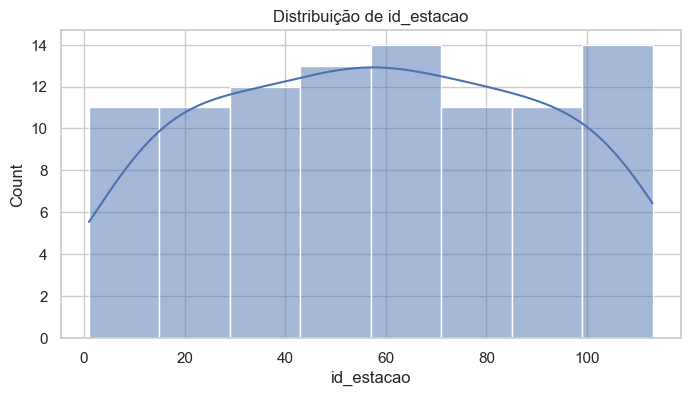

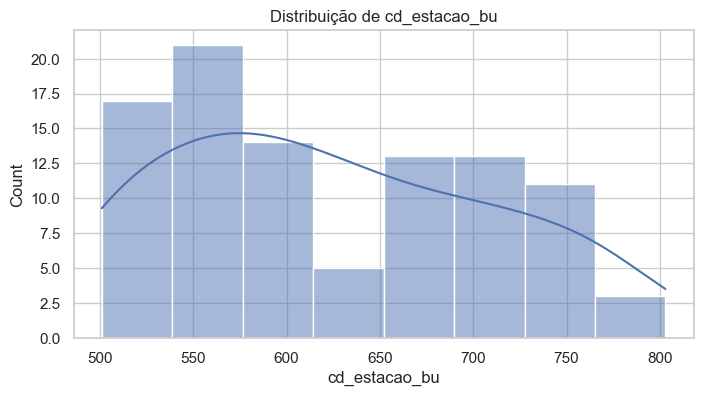

'\nExibe distribuições de variáveis numéricas em um DataFrame.\n\nFuncionalidade:\n- Para cada coluna numérica no DataFrame, cria um gráfico de histograma com uma linha de densidade (kde).\n- O histograma exibe a distribuição dos valores presentes na coluna, ignorando valores ausentes (NaN).\n\nVariáveis:\n- df (pd.DataFrame): O DataFrame contendo os dados a serem analisados.\n\nRetorna:\n- Gera e exibe gráficos de distribuição para cada variável numérica no DataFrame.\n'

In [9]:
# Exibir as distribuições das variáveis numéricas no DataFrame df
print(f"--- Distribuições de Variáveis no DataFrame ---")
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribuição de {column}')
    plt.show()

"""
Exibe distribuições de variáveis numéricas em um DataFrame.

Funcionalidade:
- Para cada coluna numérica no DataFrame, cria um gráfico de histograma com uma linha de densidade (kde).
- O histograma exibe a distribuição dos valores presentes na coluna, ignorando valores ausentes (NaN).

Variáveis:
- df (pd.DataFrame): O DataFrame contendo os dados a serem analisados.

Retorna:
- Gera e exibe gráficos de distribuição para cada variável numérica no DataFrame.
"""


**4.3 Análise de Correlações**

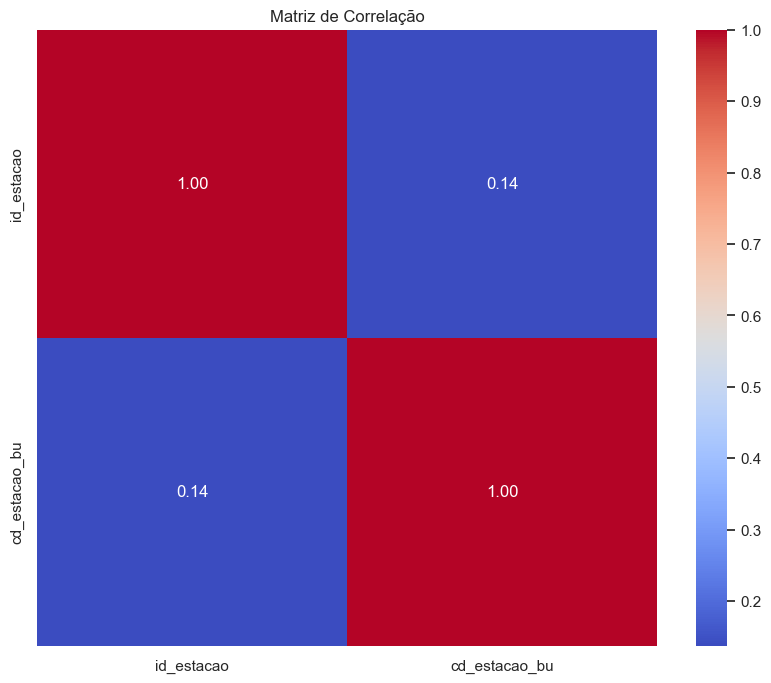

"\nExibe a matriz de correlação para as variáveis numéricas de um DataFrame.\n\nFuncionalidade:\n- Seleciona as colunas numéricas do DataFrame.\n- Calcula a matriz de correlação entre as variáveis numéricas.\n- Exibe um mapa de calor (heatmap) da matriz de correlação, com anotações dos valores.\n- O mapa de calor usa a paleta de cores 'coolwarm' para destacar correlações positivas e negativas.\n- Se não houver colunas numéricas suficientes, exibe uma mensagem informativa.\n\nVariáveis:\n- df (pd.DataFrame): O DataFrame contendo as variáveis a serem analisadas.\n\nRetorna:\n- Gera e exibe a matriz de correlação das variáveis numéricas no DataFrame, se aplicável.\n"

In [10]:
# Selecionar apenas colunas numéricas para calcular a matriz de correlação
numeric_df = df.select_dtypes(include=[np.number])

# Verificar se há colunas numéricas suficientes para gerar a matriz de correlação
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()
else:
    print("Não há colunas numéricas suficientes para calcular a correlação.")

"""
Exibe a matriz de correlação para as variáveis numéricas de um DataFrame.

Funcionalidade:
- Seleciona as colunas numéricas do DataFrame.
- Calcula a matriz de correlação entre as variáveis numéricas.
- Exibe um mapa de calor (heatmap) da matriz de correlação, com anotações dos valores.
- O mapa de calor usa a paleta de cores 'coolwarm' para destacar correlações positivas e negativas.
- Se não houver colunas numéricas suficientes, exibe uma mensagem informativa.

Variáveis:
- df (pd.DataFrame): O DataFrame contendo as variáveis a serem analisadas.

Retorna:
- Gera e exibe a matriz de correlação das variáveis numéricas no DataFrame, se aplicável.
"""


**4.4 Análise com Skimpy**

In [11]:
def analisar_dados():
    """
    Faz uma análise resumida do DataFrame.

    Usa a função `skim()` para exibir um resumo com estatísticas básicas 
    e informações sobre os dados do DataFrame.

    Exemplo:
        skim(df)
    """
    skim(df)

analisar_dados()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 97     │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ id_estacao          │    0 │      0 │    58.12 │    32.18 │     1 │    31 │    58 │   85 │   113 │ ▇▇▇▇▇▇  │  │
│ │ cd_estacao_bu       │    0 │      0 │    624.3 │    86.13 │   501 │   558 │   611 │  703 │   803 │ ▇▇▇▆▅▅  │  │
│ └─────────────────────┴──────┴────────┴──────────┴──────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ tx_prefixo                │       0 │          0 │                            1 │                       97 │  │
│ │ tx_nome                   │       0 │          0 │                          1.8 │                      171 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### 5. Análise Avançada

**5.1 Análise de Componentes Principais (PCA)**

In [12]:
def realizar_pca(df, n_componentes=2):
    """
    Realiza a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados.

    Args:
        df (pd.DataFrame): DataFrame com os dados a serem analisados.
        n_componentes (int): Número de componentes principais a serem mantidos.

    Returns:
        pd.DataFrame: DataFrame com as componentes principais.
        PCA: Objeto PCA treinado.
    """
    # Selecionar apenas variáveis numéricas e remover valores ausentes
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    # Escalonar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Aplicar PCA
    pca = PCA(n_components=n_componentes)
    principal_components = pca.fit_transform(scaled_data)

    # Criar DataFrame das componentes principais
    pca_df = pd.DataFrame(data=principal_components,
                          columns=[f'PC{i+1}' for i in range(n_componentes)])

    return pca_df, pca

# Aplicar PCA no DataFrame df
pca_df, pca_modelo = realizar_pca(df)

# Exibir os resultados
print(f"PCA realizado no DataFrame:")
print(f"Variância explicada por componente: {pca_modelo.explained_variance_ratio_}\n")

"""
Realiza a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados.

Funcionalidade:
- Seleciona as colunas numéricas do DataFrame e remove valores ausentes.
- Escalona os dados numéricos para média 0 e variância 1.
- Aplica o PCA para reduzir a dimensionalidade, mantendo o número especificado de componentes principais.

Args:
    df (pd.DataFrame): DataFrame com os dados a serem analisados.
    n_componentes (int): Número de componentes principais a serem mantidos.

Returns:
    pd.DataFrame: DataFrame com as componentes principais.
    PCA: Objeto PCA treinado, contendo informações como variância explicada.
"""


PCA realizado no DataFrame:
Variância explicada por componente: [0.56875508 0.43124492]



'\nRealiza a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados.\n\nFuncionalidade:\n- Seleciona as colunas numéricas do DataFrame e remove valores ausentes.\n- Escalona os dados numéricos para média 0 e variância 1.\n- Aplica o PCA para reduzir a dimensionalidade, mantendo o número especificado de componentes principais.\n\nArgs:\n    df (pd.DataFrame): DataFrame com os dados a serem analisados.\n    n_componentes (int): Número de componentes principais a serem mantidos.\n\nReturns:\n    pd.DataFrame: DataFrame com as componentes principais.\n    PCA: Objeto PCA treinado, contendo informações como variância explicada.\n'

**5.2 Clustering com KMeans**

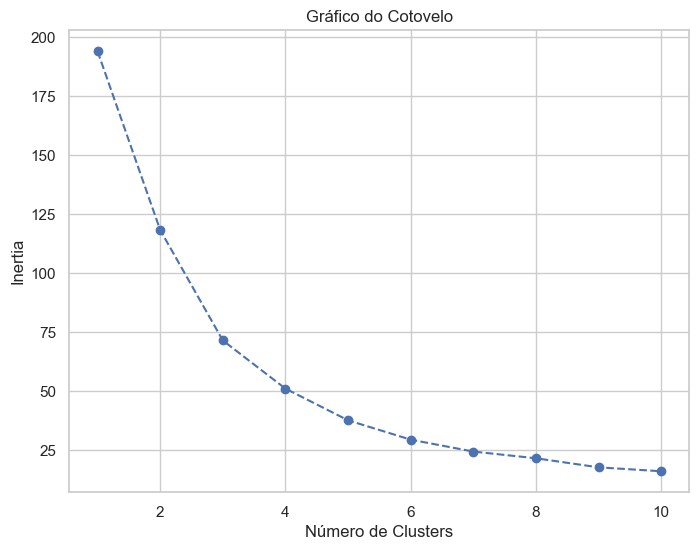

In [13]:
def plot_grafico_cotovelo(df, max_clusters=10):
    """
    Plota o gráfico do cotovelo para identificar o número ideal de clusters.

    Args:
        df (pd.DataFrame): DataFrame com os dados a serem analisados.
        max_clusters (int): Número máximo de clusters a serem testados.

    Returns:
        None: Exibe o gráfico do cotovelo.
    """
    # Selecionar apenas variáveis numéricas e remover valores ausentes
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    # Escalonar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Lista para armazenar a soma das distâncias quadradas dentro dos clusters (inertia)
    inertias = []

    # Aplicar KMeans com diferentes números de clusters
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)

    # Plotar o gráfico do cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o', linestyle='--')
    plt.title('Gráfico do Cotovelo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Aplicar o gráfico do cotovelo no DataFrame df
plot_grafico_cotovelo(df, max_clusters=10)



In [14]:
def realizar_kmeans(df, n_clusters=4):
    """
    Aplica o algoritmo de clustering KMeans para agrupar os dados de um DataFrame.

    Args:
        df (pd.DataFrame): DataFrame com os dados a serem agrupados.
        n_clusters (int): Número de clusters a serem formados (default = 3).

    Returns:
        KMeans: Modelo KMeans treinado.
        np.ndarray: Rótulos dos clusters para cada amostra.
    """
    # Selecionar apenas variáveis numéricas e remover valores ausentes
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    # Escalonar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Aplicar KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    return kmeans, labels, scaled_data

# Aplicar KMeans no DataFrame df
kmeans_modelo, labels, scaled_data = realizar_kmeans(df, n_clusters=4)

In [15]:
def plot_kmeans_clusters(df, kmeans, labels, scaled_data):
    """
    Cria um gráfico interativo em 2D ou 3D usando Plotly, mostrando os clusters e os centroides.

    Args:
        df (pd.DataFrame): DataFrame original.
        kmeans (KMeans): Modelo KMeans treinado.
        labels (np.ndarray): Rótulos dos clusters para cada amostra.
        scaled_data (np.ndarray): Dados escalonados usados no KMeans.

    Returns:
        None: Exibe o gráfico interativo com Plotly.
    """
    # Reduzir a dimensionalidade para 2D com PCA (caso tenha mais de 2 dimensões)
    if scaled_data.shape[1] > 2:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
    else:
        reduced_data = scaled_data

    # Criar DataFrame com os componentes principais ou dados originais
    plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    plot_df['cluster'] = labels

    # Adicionar os centroides ao gráfico
    centroids = kmeans.cluster_centers_
    if scaled_data.shape[1] > 2:
        centroids = pca.transform(centroids)

    # Gráfico de dispersão com Plotly
    fig = px.scatter(
        plot_df, x='PC1', y='PC2', color=plot_df['cluster'].astype(str),
        title="KMeans Clustering com Centroides",
        labels={'color': 'Cluster'}
    )

    # Adicionar os centroides ao gráfico
    for i, centroid in enumerate(centroids):
        fig.add_scatter(
            x=[centroid[0]], y=[centroid[1]], 
            mode='markers', 
            marker=dict(size=12, symbol='x', color='red'),
            name=f'Centroid {i+1}'
        )

    fig.show()


# Exibir o gráfico interativo
plot_kmeans_clusters(df, kmeans_modelo, labels, scaled_data)

In [16]:
# Adicionar os rótulos de clusters ao DataFrame original
df['cluster'] = labels

# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calcular a média de cada variável numérica por cluster
cluster_means = df.groupby('cluster')[numeric_columns].mean()

# Exibir as médias de cada variável numérica por cluster
print(cluster_means)

"""
Calcula e exibe as médias das variáveis numéricas por cluster.

Funcionalidade:
- Adiciona os rótulos dos clusters ao DataFrame original.
- Seleciona as colunas numéricas do DataFrame.
- Agrupa os dados pelos clusters e calcula a média de cada variável numérica para cada cluster.

Args:
    df (pd.DataFrame): DataFrame original contendo os dados.
    labels (np.ndarray): Rótulos dos clusters para cada amostra no DataFrame.

Retorna:
    None: Exibe as médias de cada variável numérica por cluster no terminal.
"""


         id_estacao  cd_estacao_bu  cluster
cluster                                    
0         32.950000     719.550000      0.0
1         91.870968     670.677419      1.0
2         22.772727     554.454545      2.0
3         67.916667     548.958333      3.0


'\nCalcula e exibe as médias das variáveis numéricas por cluster.\n\nFuncionalidade:\n- Adiciona os rótulos dos clusters ao DataFrame original.\n- Seleciona as colunas numéricas do DataFrame.\n- Agrupa os dados pelos clusters e calcula a média de cada variável numérica para cada cluster.\n\nArgs:\n    df (pd.DataFrame): DataFrame original contendo os dados.\n    labels (np.ndarray): Rótulos dos clusters para cada amostra no DataFrame.\n\nRetorna:\n    None: Exibe as médias de cada variável numérica por cluster no terminal.\n'

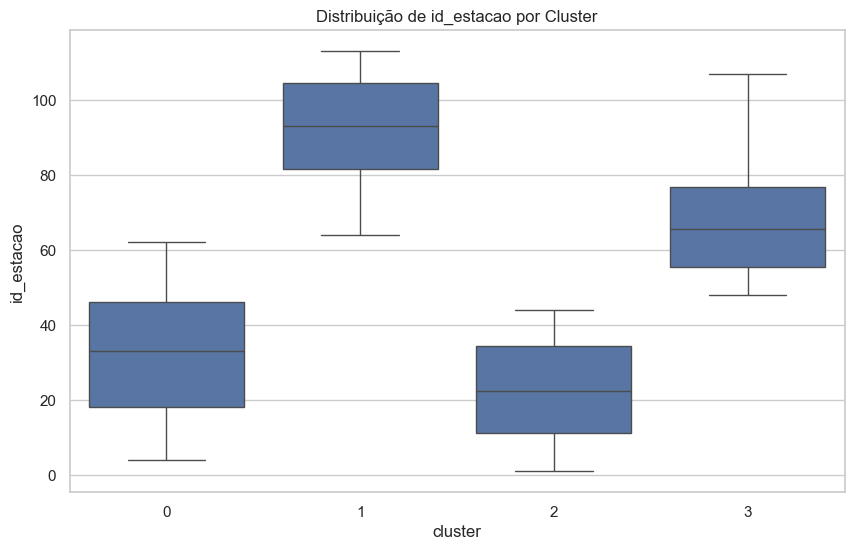

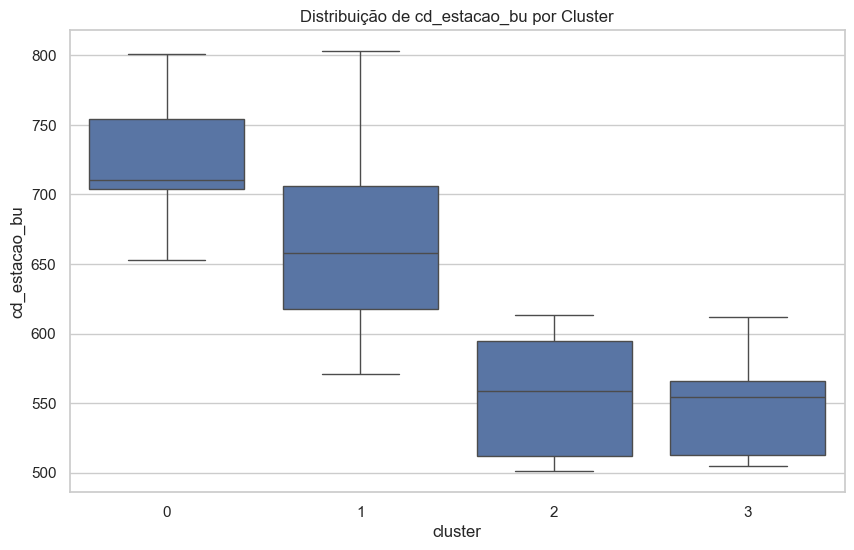

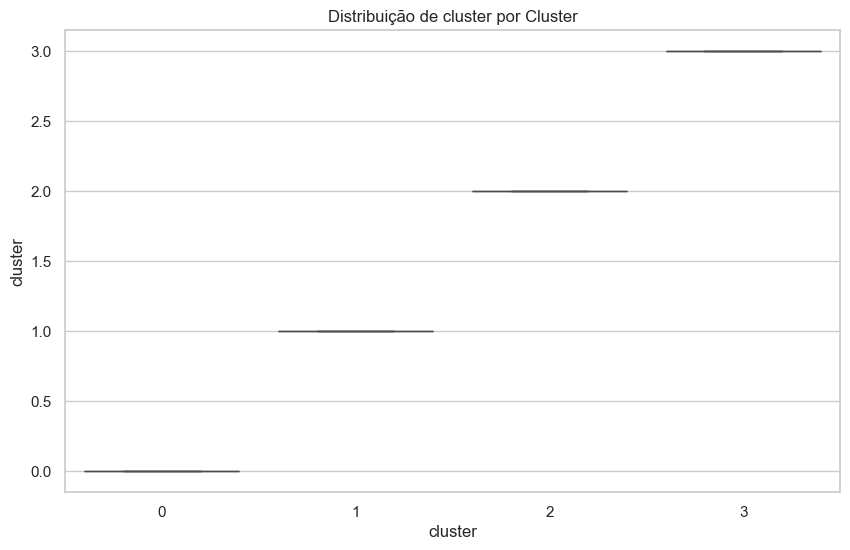

"\nPlota a distribuição das variáveis numéricas por cluster usando boxplots.\n\nFuncionalidade:\n- Itera sobre as colunas numéricas do DataFrame.\n- Para cada coluna, cria um boxplot mostrando a distribuição da variável em cada cluster.\n- Ajuda a visualizar como os valores das variáveis diferem entre os clusters.\n\nArgs:\n    df (pd.DataFrame): DataFrame com os dados e os rótulos dos clusters. \n                       O DataFrame deve conter uma coluna 'cluster' com os rótulos gerados pelo KMeans.\n\nRetorna:\n    None: O código gera e exibe os gráficos de boxplot para cada variável numérica por cluster.\n"

In [17]:
# Iterar sobre as colunas numéricas para exibir a distribuição de cada uma, por cluster
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(f'Distribuição de {column} por Cluster')
    plt.show()

"""
Plota a distribuição das variáveis numéricas por cluster usando boxplots.

Funcionalidade:
- Itera sobre as colunas numéricas do DataFrame.
- Para cada coluna, cria um boxplot mostrando a distribuição da variável em cada cluster.
- Ajuda a visualizar como os valores das variáveis diferem entre os clusters.

Args:
    df (pd.DataFrame): DataFrame com os dados e os rótulos dos clusters. 
                       O DataFrame deve conter uma coluna 'cluster' com os rótulos gerados pelo KMeans.

Retorna:
    None: O código gera e exibe os gráficos de boxplot para cada variável numérica por cluster.
"""


### 6. Visualizações Avançadas

**6.1 Visualização dos Resultados do PCA**

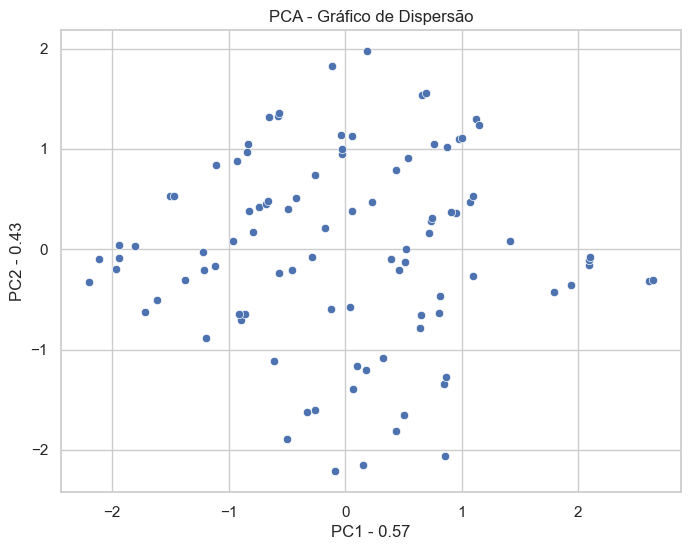

'\nCria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.\n\nFuncionalidade:\n- O gráfico de dispersão exibe os pontos correspondentes às amostras nos eixos das componentes principais (PC1 e PC2).\n- Os rótulos dos eixos indicam a porcentagem de variância explicada por cada componente.\n\nArgs:\n    pca_df (pd.DataFrame): DataFrame contendo os valores das componentes principais (PC1 e PC2).\n    pca_modelo (PCA): Modelo PCA treinado, contendo as variâncias explicadas por cada componente principal.\n\nReturns:\n    None: O gráfico de dispersão é exibido com Plotly, mostrando as componentes principais e sua variância explicada.\n'

In [18]:
def plot_pca_scatter(pca_df, pca_modelo):
    """
    Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.

    Args:
        pca_df (pd.DataFrame): DataFrame com os dados das componentes principais resultantes da PCA (PC1, PC2).
        pca_modelo (PCA): O modelo PCA treinado, contendo as variâncias explicadas para as componentes principais.

    Returns:
        None: Exibe o gráfico de dispersão das componentes principais (PC1 e PC2).
    """
    # Criar o gráfico de dispersão
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)

    # Adicionar título e rótulos aos eixos com a variância explicada por cada componente
    plt.title('PCA - Gráfico de Dispersão')
    plt.xlabel(f'PC1 - {pca_modelo.explained_variance_ratio_[0]:.2f}')
    plt.ylabel(f'PC2 - {pca_modelo.explained_variance_ratio_[1]:.2f}')
    
    # Exibir o gráfico
    plt.show()

plot_pca_scatter(pca_df, pca_modelo)
    
"""
Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.

Funcionalidade:
- O gráfico de dispersão exibe os pontos correspondentes às amostras nos eixos das componentes principais (PC1 e PC2).
- Os rótulos dos eixos indicam a porcentagem de variância explicada por cada componente.

Args:
    pca_df (pd.DataFrame): DataFrame contendo os valores das componentes principais (PC1 e PC2).
    pca_modelo (PCA): Modelo PCA treinado, contendo as variâncias explicadas por cada componente principal.

Returns:
    None: O gráfico de dispersão é exibido com Plotly, mostrando as componentes principais e sua variância explicada.
"""


**6.2 Visualização dos Clusters com KMeans**

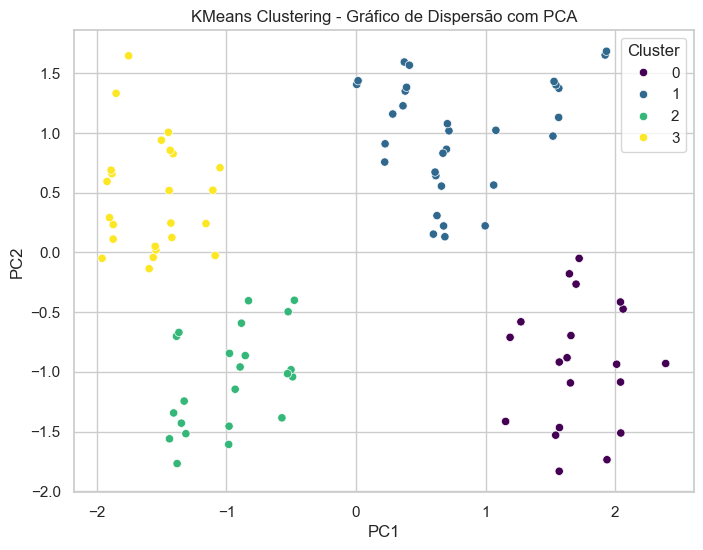

In [19]:
def plot_kmeans_clusters(df, labels, pca_modelo):
    """
    Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA, 
    colorido pelos rótulos de clusters gerados pelo KMeans.

    Args:
        df (pd.DataFrame): DataFrame original com os dados a serem agrupados.
        labels (np.ndarray): Rótulos dos clusters gerados pelo KMeans.
        pca_modelo (PCA): O modelo PCA já ajustado aos dados para reduzir a dimensionalidade.

    Returns:
        None: Exibe o gráfico de dispersão com as componentes principais e os clusters.
    """
    # Reduzir a dimensionalidade para 2D usando PCA para visualização
    pca_df, _ = realizar_pca(df, n_componentes=2)

    # Criar o gráfico de dispersão, colorindo pelos rótulos de cluster
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue=labels, palette='viridis', data=pca_df)

    # Adicionar título e rótulos aos eixos
    plt.title('KMeans Clustering - Gráfico de Dispersão com PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')

    # Exibir o gráfico
    plt.show()

plot_kmeans_clusters(df, labels, pca_modelo)



### 7. Conclusões

### Descobertas:

- **Descoberta 1: Dicionário de Estações**  
  Ao invés de tratar-se de uma base de dados operacionais, o conjunto utilizado é, na verdade, um dicionário que contém as seguintes informações para cada estação: `id_estacao`, `tx_prefixo`, `tx_nome` e `cd_estacao_bu`. Essas variáveis representam dados estruturais, como o identificador da estação (ID), o nome da estação e o código relacionado ao sistema de transporte (BU), sem fornecer métricas de desempenho, demanda ou outras variáveis operacionais que poderiam ser usadas em análises mais complexas, como previsões ou otimizações.

- **Descoberta 2: Estrutura dos Dados**  
  O dicionário organiza as estações da CPTM por seus identificadores (`id_estacao`) e códigos de estação (`cd_estacao_bu`), sendo que esses elementos não estão correlacionados de forma direta, como demonstrado pela baixa correlação (0.14) entre essas variáveis. Isso indica que os IDs e códigos não seguem uma lógica linear ou previsível entre si, possivelmente sendo atribuídos com base em critérios independentes, como geografia, infraestrutura ou integração com outros sistemas.

- **Descoberta 3: Dados Limitados para Análises Complexas**  
  Como o dicionário de estações não contém variáveis operacionais (como fluxo de passageiros, horários de pico, ou dados financeiros), ele não permite análises preditivas ou a aplicação de técnicas mais avançadas, como otimização de desempenho ou previsão de demanda. Trata-se de um recurso de identificação e organização, útil para gerenciar as estações e facilitar a consulta de suas características básicas.

- **Descoberta 4: Clusters Baseados em IDs e Códigos**  
  Embora seja possível agrupar as estações de acordo com as variáveis disponíveis (`id_estacao` e `cd_estacao_bu`), os clusters formados seriam puramente descritivos, sem trazer informações adicionais sobre a operação das estações. Isso significa que qualquer agrupamento derivado deste dicionário seria uma organização formal dos dados, sem implicações diretas sobre o funcionamento ou a performance das estações.

### Hipóteses:

Não é possível formular hipóteses relevantes com base no dicionário de estações, pois os dados presentes (`id_estacao`, `tx_prefixo`, `tx_nome` e `cd_estacao_bu`) são apenas informações estáticas de identificação. Para gerar hipóteses sobre o funcionamento ou a otimização das operações da CPTM, seriam necessários dados operacionais ou métricas relacionadas à performance, fluxo de passageiros, manutenção ou infraestrutura.

### 8. Salvamento dos Dados Processados

In [20]:
def salvar_df_como_parquet(df, file_name, data_dir):
    """
    Salva um DataFrame processado em formato Parquet.

    Args:
        df (pd.DataFrame): DataFrame com os dados processados a serem salvos.
        file_name (str): Nome do arquivo Parquet (sem extensão).
        data_dir (str): Diretório onde o arquivo Parquet será salvo.

    Returns:
        str: Caminho completo do arquivo Parquet salvo.
    """
    # Criar o diretório de dados processados, se não existir
    processed_data_dir = os.path.join(data_dir, 'processed')
    os.makedirs(processed_data_dir, exist_ok=True)

    # Caminho completo para salvar o arquivo Parquet (sem sufixo '_processed')
    parquet_path = os.path.join(processed_data_dir, f"{file_name}.parquet")

    # Salvar o DataFrame no formato Parquet
    df.to_parquet(parquet_path, index=False)

    # Exibir a mensagem de confirmação
    print(f"Dados processados salvos em: {parquet_path}")

    return parquet_path

salvar_df_como_parquet(df, "estacao", DATA_DIR)


Dados processados salvos em: C:/Users/Inteli/Documents/dados_cptm/caixa_preta/processed\estacao.parquet


'C:/Users/Inteli/Documents/dados_cptm/caixa_preta/processed\\estacao.parquet'

### 9. Upload dos Dados Processados para o S3

In [21]:
# Carregar as variáveis do .env
load_dotenv()

# Acessar as variáveis de ambiente
aws_access_key = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')
aws_session_token = os.getenv('AWS_SESSION_TOKEN')
aws_region_name = os.getenv('AWS_REGION_NAME')

# Verificar se as variáveis foram carregadas corretamente
if not aws_access_key or not aws_secret_access_key or not aws_session_token or not aws_region_name:
    raise ValueError("As credenciais da AWS ou a região não foram carregadas corretamente.")

In [22]:
# Usar as credenciais com o boto3
s3 = boto3.client('s3',
                  aws_access_key_id=aws_access_key,
                  aws_secret_access_key=aws_secret_access_key,
                  aws_session_token=aws_session_token,
                  region_name=aws_region_name)

bucket_name = f"perola-negra"  

# Tentar criar o bucket no S3
try:
    if aws_region_name == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    else:
        s3.create_bucket(Bucket=bucket_name,
                         CreateBucketConfiguration={'LocationConstraint': aws_region_name})
    
    print(f"Bucket '{bucket_name}' criado com sucesso.")
except s3.exceptions.BucketAlreadyOwnedByYou:
    print(f"Bucket '{bucket_name}' já existe e é de sua propriedade.")
except Exception as e:
    print(f"Erro ao criar bucket: {e}")

Erro ao criar bucket: An error occurred (ExpiredToken) when calling the CreateBucket operation: The provided token has expired.


In [23]:
def upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, data_dir):
    """
    Faz o upload de um arquivo Parquet específico para uma subpasta em um bucket S3.

    Args:
        parquet_file_name (str): Nome do arquivo Parquet a ser enviado (sem extensão .parquet).
        bucket_name (str): Nome do bucket S3.
        subpasta (str): Nome da subpasta dentro do bucket S3.
        data_dir (str): Diretório local onde o arquivo Parquet está salvo.

    Returns:
        None
    """
    parquet_local = os.path.join(data_dir, f"{parquet_file_name}.parquet")

    s3_key = f"{subpasta}/{parquet_file_name}.parquet"

    try:
        # Enviar o arquivo para o bucket S3 na subpasta especificada
        s3.upload_file(parquet_local, bucket_name, s3_key)
        print(f"Arquivo '{parquet_local}' enviado para '{s3_key}' no bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Erro ao enviar arquivo para S3: {e}")

PROCESSED_DATA_DIR = 'C:/Users/Inteli/Documents/dados_cptm/caixa_preta/processed/'

# Definir nome do bucket e subpasta
bucket_name = 'perola-negra'
subpasta = 'caixapreta'
parquet_file_name = 'estacao'

upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, PROCESSED_DATA_DIR)

Erro ao enviar arquivo para S3: Failed to upload C:/Users/Inteli/Documents/dados_cptm/caixa_preta/processed/estacao.parquet to perola-negra/caixapreta/estacao.parquet: An error occurred (ExpiredToken) when calling the PutObject operation: The provided token has expired.
